* Hussein Badawy ........................ 20190183

* Nour Eldin Ezzat     ........................ 20190593

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import keras.utils as image

%matplotlib inline

In [ ]:
import matplotlib.image as mplib

img1 = mplib.imread('/content/custom/dog.4001.jpg')
img2 = mplib.imread('/content/custom/dog.4002.jpg')
img3 = mplib.imread('/content/custom/dog.4003.jpg')
print('1',img1.shape,'2',img2.shape,'3',img3.shape)


1 (499, 421, 3) 2 (500, 428, 3) 3 (447, 297, 3)


In [ ]:
path= "../content/custom/"

from pathlib import Path

data = []
for filename in os.listdir(path):
    if filename.endswith(".jpg"):
        img = image.load_img(path + filename, target_size=(300, 300))
        data.append(image.img_to_array(img))
data = np.array(data)

In [ ]:
#img1_reshaped = np.reshape(img1,(449,468*3))
img2_reshaped = np.reshape(img2,(500,428*3))
img3_reshaped = np.reshape(img3,(447,297*3))
#print('1',img1_reshaped.shape,'2',img2_reshaped.shape,'3',img3_reshaped.shape)
img3_reshaped.shape


(447, 891)

In [ ]:
img3_meaned = img3_reshaped - np.mean(img3_reshaped, axis = 0)
print (img3_meaned)

[[-8.31991051 -7.34004474 -6.73378076 ... -6.74049217 -6.3557047
  -5.91946309]
 [-8.31991051 -7.34004474 -6.73378076 ... -6.74049217 -6.3557047
  -5.91946309]
 [-8.31991051 -7.34004474 -6.73378076 ... -7.74049217 -7.3557047
  -6.91946309]
 ...
 [ 9.68008949  8.65995526 10.26621924 ...  8.25950783  8.6442953
   7.08053691]
 [14.68008949 13.65995526 15.26621924 ...  6.25950783  6.6442953
   5.08053691]
 [12.68008949 11.65995526 13.26621924 ... -0.74049217  1.6442953
  -0.91946309]]


(-0.5, 890.5, 446.5, -0.5)

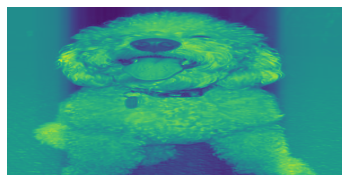

In [ ]:
plt.imshow(img3_meaned)
plt.axis('off')

In [ ]:
cov_mat = np.cov(img3_meaned , rowvar = False)   # rowvar = False >> work with X_meaned as transposed


In [ ]:
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)


In [ ]:
print (eigen_vectors.shape)
print (eigen_values)

(891, 891)
[-8.27070544e-11 -4.49163474e-11 -4.45174990e-11 -4.15306685e-11
 -3.76678620e-11 -3.38730145e-11 -3.10545997e-11 -3.04666573e-11
 -3.03656759e-11 -3.00861635e-11 -3.00484254e-11 -2.92379283e-11
 -2.78369678e-11 -2.77666833e-11 -2.66137607e-11 -2.52813097e-11
 -2.50869249e-11 -2.49689328e-11 -2.41056238e-11 -2.39726994e-11
 -2.39546695e-11 -2.36360406e-11 -2.35557066e-11 -2.29916775e-11
 -2.27278420e-11 -2.17664879e-11 -2.17551298e-11 -2.16398618e-11
 -2.14234458e-11 -2.10003889e-11 -2.08459977e-11 -2.03555822e-11
 -2.03162159e-11 -1.96262337e-11 -1.93677237e-11 -1.93509947e-11
 -1.89817962e-11 -1.88563912e-11 -1.85195244e-11 -1.82872002e-11
 -1.82694060e-11 -1.81078586e-11 -1.80985699e-11 -1.75338128e-11
 -1.74310707e-11 -1.73229038e-11 -1.67713720e-11 -1.65905397e-11
 -1.63258877e-11 -1.61217904e-11 -1.61137139e-11 -1.54939367e-11
 -1.53289110e-11 -1.53043096e-11 -1.49697109e-11 -1.47998887e-11
 -1.46511918e-11 -1.45692102e-11 -1.45195047e-11 -1.44147049e-11
 -1.43565647e-

In [ ]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
print (sorted_index)
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors
sorted_eigenvectors = eigen_vectors[:,sorted_index]

[890 889 888 887 886 885 884 883 882 881 880 879 878 877 876 875 874 873
 872 871 870 869 868 867 866 865 864 863 862 861 860 859 858 857 856 855
 854 853 852 851 850 849 848 847 846 845 844 843 842 841 840 839 838 837
 836 835 834 833 832 831 830 829 828 827 826 825 824 823 822 821 820 819
 818 817 816 815 814 813 812 811 810 809 808 807 806 805 804 803 802 801
 800 799 798 797 796 795 794 793 792 791 790 789 788 787 786 785 784 783
 782 781 780 779 778 777 776 775 774 773 772 771 770 769 768 767 766 765
 764 763 762 761 760 759 758 757 756 755 754 753 752 751 750 749 748 747
 746 745 744 743 742 741 740 739 738 737 736 735 734 733 732 731 730 729
 728 727 726 725 724 723 722 721 720 719 718 717 716 715 714 713 712 711
 710 709 708 707 706 705 704 703 702 701 700 699 698 697 696 695 694 693
 692 691 690 689 688 687 686 685 684 683 682 681 680 679 678 677 676 675
 674 673 672 671 670 669 668 667 666 665 664 663 662 661 660 659 658 657
 656 655 654 653 652 651 650 649 648 647 646 645 64

In [ ]:
n_components = 8 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

[[-0.00038244 -0.00688637  0.01072253 ... -0.00750085  0.00540686
  -0.00240411]
 [-0.00016197 -0.00614873  0.00893286 ... -0.00465631  0.00517685
   0.00030562]
 [ 0.00018328 -0.00600751  0.00860403 ... -0.00352063  0.00470286
   0.00106082]
 ...
 [-0.00010151 -0.00679075  0.00928942 ... -0.00157769  0.00428216
  -0.00018324]
 [-0.00020476 -0.00636787  0.00867855 ... -0.00141963  0.00393526
  -0.00072757]
 [ 0.00010753 -0.00627046  0.00792106 ...  0.00010027  0.00307462
  -0.00047389]]


(891, 8)

In [ ]:
print (eigenvector_subset)
eigenvector_subset.shape

[[-0.00038244 -0.00688637  0.01072253 ... -0.00181086  0.00286248
  -0.00374129]
 [-0.00016197 -0.00614873  0.00893286 ... -0.0021486   0.00092704
  -0.00187264]
 [ 0.00018328 -0.00600751  0.00860403 ... -0.00363663  0.00213691
  -0.00113478]
 ...
 [-0.00010151 -0.00679075  0.00928942 ...  0.00295832  0.00172215
   0.00183615]
 [-0.00020476 -0.00636787  0.00867855 ...  0.00272882  0.00152985
   0.00091281]
 [ 0.00010753 -0.00627046  0.00792106 ...  0.0021756   0.00142522
   0.00128762]]


(891, 16)

In [ ]:
n_components = 16 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

[[-0.00038244 -0.00688637  0.01072253 ... -0.00707246  0.00922262
  -0.01956326]
 [-0.00016197 -0.00614873  0.00893286 ... -0.00584547 -0.00027847
  -0.00658007]
 [ 0.00018328 -0.00600751  0.00860403 ... -0.00317028  0.00206283
  -0.00750317]
 ...
 [-0.00010151 -0.00679075  0.00928942 ... -0.00827308 -0.00139644
  -0.01080968]
 [-0.00020476 -0.00636787  0.00867855 ... -0.00807295 -0.00337219
  -0.01081336]
 [ 0.00010753 -0.00627046  0.00792106 ... -0.00566076 -0.00507825
  -0.00960854]]


(891, 32)

In [ ]:
print (eigenvector_subset)
eigenvector_subset.shape

[[-0.00038244 -0.00688637  0.01072253 ... -0.01060121  0.00833203
  -0.00960772]
 [-0.00016197 -0.00614873  0.00893286 ... -0.01556042  0.01353395
  -0.01802379]
 [ 0.00018328 -0.00600751  0.00860403 ... -0.01363644  0.01218055
  -0.01361775]
 ...
 [-0.00010151 -0.00679075  0.00928942 ...  0.00466303  0.02080787
  -0.00558719]
 [-0.00020476 -0.00636787  0.00867855 ...  0.00244551  0.01492742
  -0.00979536]
 [ 0.00010753 -0.00627046  0.00792106 ...  0.00233088  0.01480444
  -0.00745703]]


(891, 64)

In [ ]:
n_components = 32 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

[[2668.35872593  356.77124297 -285.61072643 ... -249.58577329
     9.1389842  -195.15119027]
 [2670.2408847   354.19879017 -286.91242371 ... -250.55827283
     7.00139608 -196.32004578]
 [2670.84087294  354.18858096 -286.53307002 ... -251.45620181
     7.74252763 -196.57957354]
 ...
 [1585.7788672  -791.54111258  -62.72690235 ...  156.54954941
    56.25921778  401.96552075]
 [1630.426329   -727.93224918  -30.753838   ...   89.32517503
    31.42192159  390.08006448]
 [1688.99309022 -745.15168365  -51.62557171 ...   77.25141269
    59.01786397  360.97482026]]
(447, 8)


In [ ]:
print (eigenvector_subset)
eigenvector_subset.shape

<function matplotlib.pyplot.show(*args, **kw)>

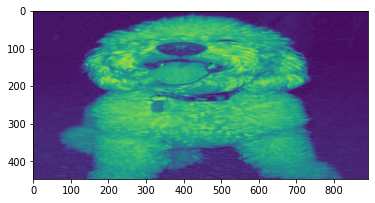

In [ ]:
n_components = 64 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [ ]:
print (eigenvector_subset)
eigenvector_subset.shape

In [ ]:
img3_reduced = np.dot(eigenvector_subset.transpose(),img3_meaned.transpose()).transpose()
print(img3_reduced)
print(img3_reduced.shape)

# real img

In [ ]:
from sklearn.decomposition import PCA
plt.imshow(img3)
plt.show

# reconstructed 

* 8

<function matplotlib.pyplot.show(*args, **kw)>

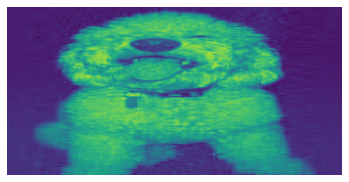

In [ ]:

pca = PCA(8).fit(img3_reshaped)
img_trans = pca.transform(img3_reshaped)
img_inv = pca.inverse_transform(img_trans)
img3 = np.reshape(img_inv,(447,297*3))
plt.axis('off')
plt.imshow(img3)
plt.show

* 16

<function matplotlib.pyplot.show(*args, **kw)>

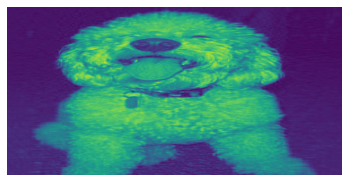

In [ ]:
pca = PCA(16).fit(img3_reshaped)
img_trans = pca.transform(img3_reshaped)
img_inv = pca.inverse_transform(img_trans)
img3 = np.reshape(img_inv,(447,297*3))
plt.axis('off')
plt.imshow(img3)
plt.show

* 32

In [ ]:
pca = PCA(32).fit(img3_reshaped)
img_trans = pca.transform(img3_reshaped)
img_inv = pca.inverse_transform(img_trans)
img3 = np.reshape(img_inv,(447,297*3))
plt.axis('off')
plt.imshow(img3)
plt.show

* 64

In [ ]:
pca = PCA(64).fit(img3_reshaped)
img_trans = pca.transform(img3_reshaped)
img_inv = pca.inverse_transform(img_trans)
img3 = np.reshape(img_inv,(447,297*3))
plt.axis('off')
plt.imshow(img3)
plt.show

#  Conclusion

#**Compared To Reconstructed Images From AutoEncoder PCA Gives Better Results With much Less Computational Power**

 # PCA vs Autoencoder

Although PCA is fundamentally a linear transformation, auto-encoders may describe complicated non-linear processes.Because PCA features are projections onto the orthogonal basis, they are completely linearly uncorrelated.
 However, since autoencoded features are only trained for correct reconstruction, they may have correlations.
* PCA is quicker and less expensive to compute than autoencoders.
* PCA is quite similar to a single layered autoencoder with a linear activation function.
* Because of the large number of parameters, the autoencoder is prone to overfitting. (However, regularization and proper planning might help to prevent this).